In [141]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [143]:
# 한글폰트 깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')  # 나눔바른고딕 폰트 설정

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [144]:
data = {
    'tra':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/air_visit_data.csv'),
    'as':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/air_store_info.csv'),
    'hs':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/hpg_store_info.csv'),
    'ar':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/air_reserve.csv'),
    'hr':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/hpg_reserve.csv'),
    'id':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/store_id_relation.csv'),
    'tes':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/sample_submission.csv'),
    'hol':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/date_info.csv').rename(columns={
        'calendar_date': 'visit_date'
    })
}

# data_backup = copy.deepcopy(data)

__일본 공휴일__
- 연간 공휴일은 16일이며 4월 말 ~ 5월 초 공휴일이 집중되어 있는 골든 위크 기간이 있는 것이 특징임  
- 골든 위크 : 4월 29일(쇼와의 날)부터 5월 3일(헌법 기념일), 5월 4일(녹색의 날), 5월 5일(어린이날), 5월 6일 (대체 휴무일)까지 연휴가 이어지는 주간이며 회사 사정에 따라 8~10일간 쉴 수 있도록 하는 연휴를 말한다.

## Data Overview

### air_visit_data

In [145]:
print(data['tra'].shape)
data['tra'].head()

(252108, 3)


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [146]:
data['tra'].describe(include='object')

,air_store_id,visit_date
count,252108,252108
unique,829,478
top,air_5c817ef28f236bdf,2017-03-17
freq,477,799


레스토랑의 개수는 총 829개 이다

In [147]:
data['tra'].describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


### air_reserve

In [148]:
data['ar'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   air_store_id      92378 non-null  object
 1   visit_datetime    92378 non-null  object
 2   reserve_datetime  92378 non-null  object
 3   reserve_visitors  92378 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [149]:
print(data['ar'].shape)
data['ar'].head()

(92378, 4)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


air_store의 예약정보(방문 시간, 예약 시점, 방문객수)를 알 수 있다.

In [150]:
data['ar'].describe(include='object')

,air_store_id,visit_datetime,reserve_datetime
count,92378,92378,92378
unique,314,4975,7513
top,air_8093d0b565e9dbdf,2016-12-24 19:00:00,2016-11-24 18:00:00
freq,2263,255,106


예약 정보를 확인할 수 있는 레스토랑(air_store)은 총 314개 이다.

In [151]:
data['ar'].describe()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


### hpg_reserve

In [152]:
data['hr'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000320 entries, 0 to 2000319
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   hpg_store_id      object
 1   visit_datetime    object
 2   reserve_datetime  object
 3   reserve_visitors  int64 
dtypes: int64(1), object(3)
memory usage: 61.0+ MB


In [153]:
print(data['hr'].shape)
data['hr'].head()

(2000320, 4)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


hpg_store의 예약정보(방문 시간, 예약 시점, 방문객수)를 알 수 있다.

In [154]:
data['hr'].describe(include='object')

,hpg_store_id,visit_datetime,reserve_datetime
count,2000320,2000320,2000320
unique,13325,9847,11450
top,hpg_2afd5b187409eeb4,2016-12-16 19:00:00,2016-12-12 21:00:00
freq,1155,10528,907


예약 정보를 확인할 수 있는 레스토랑(hpg_store)은 총 13325개 이다.

In [155]:
data['hr'].describe()

,reserve_visitors
count,2.000320e+06
mean,5.073785e+00
std,5.416172e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.000000e+02


### aif_store_info

In [156]:

print(data['as'].shape)
data['as'].head()

(829, 5)


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


air_store_info를 통해 요리 카테고리, 레스토랑 위치를 확인할 수 있다. 

In [157]:
data['as'].describe(include='object')

,air_store_id,air_genre_name,air_area_name
count,829,829,829
unique,829,14,103
top,air_3f91d592acd6cc0b,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō
freq,1,197,64


In [158]:
data['as'].describe()

,latitude,longitude
count,829.000000,829.000000
mean,35.647042,137.415311
std,2.084659,3.650971
min,33.211967,130.195555
25%,34.695124,135.341564
50%,35.658068,139.685474
75%,35.694003,139.751599
max,44.020632,144.273398


### hpg_store_info

In [159]:
print(data['hs'].shape)
data['hs'].head()

(4690, 5)


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


air_store_info를 통해  요리 카테고리, 레스토랑 위치를 확인할 수 있다. 

In [160]:
data['hs'].describe(include='object')

,hpg_store_id,hpg_genre_name,hpg_area_name
count,4690,4690,4690
unique,4690,34,119
top,hpg_f7179b33ac4287d0,Japanese style,Tōkyō-to Shinjuku-ku None
freq,1,1750,257


4690개의 레스토랑 정보를 확인할 수 있다.  
레스토랑의 종류는 34가지이며, 그 중 Japanese style의 레스토랑이 가장 많다.  
도쿄도 지역에 hpg_store가 가장 많이 있다.

In [161]:
data['hs'].describe()

,latitude,longitude
count,4690.000000,4690.000000
mean,35.810261,137.675816
std,2.138755,3.197233
min,33.311645,130.339313
25%,34.692109,135.498859
50%,35.659214,139.495733
75%,35.703381,139.737998
max,43.774846,143.714585


### date_info

In [162]:

print(data['hol'].shape)
data['hol'].head()

(517, 3)


,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [163]:
data['hol'].value_counts('holiday_flg')

holiday_flg
0    482
1     35
dtype: int64

해당 기간 중 휴일이 35번 있다.

### store_id_relation

In [164]:
print(data['id'].shape)
data['id'].head()

(150, 2)


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


150개의 레스토랑이 air_store_id 와 hpg_store_id 가 동시에 존재하는 경우이다

In [165]:
# sample_submission
print(data['tes'].shape)
data['tes'].head()

(32019, 2)


,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


### 결측치 확인

In [166]:
data['tra'].isnull().sum()

air_store_id    0
visit_date      0
visitors        0
dtype: int64

In [167]:
data['ar'].isnull().sum()

air_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64

In [168]:
data['hr'].isnull().sum()

hpg_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64

In [169]:
data['as'].isnull().sum()

air_store_id      0
air_genre_name    0
air_area_name     0
latitude          0
longitude         0
dtype: int64

In [170]:
data['hs'].isnull().sum()

hpg_store_id      0
hpg_genre_name    0
hpg_area_name     0
latitude          0
longitude         0
dtype: int64

In [171]:
data['hol'].isnull().sum()

visit_date     0
day_of_week    0
holiday_flg    0
dtype: int64

In [172]:
data['id'].isnull().sum()

air_store_id    0
hpg_store_id    0
dtype: int64

분석하고자 하는 데이터셋은 결측치가 없는 것으로 확인된다.

## Data Visualization

### Restaurant Location Clustering

행정구역 상으로는 아니지만 일본의 영토는 전통적으로 아래와 같이 8개 지역으로 나뉘어진다고 합니다.  
우리는 이 8개의 지역을 기반으로 레스토랑의 위치를 Clustering 합니다.

<img src="https://drive.google.com/uc?id=1V9gFFDxsyNtAgIGqJkugZlNMp2gpsaL1" width=640, height=480>

__지역별 레스토랑 위치 시각화__

In [173]:
# folium은 지도 시각화에 아주 유용한 모듈
import folium
from folium import plugins

In [174]:
# 지역별 레스토랑 위치 지도 그리기
location = data['as'].groupby(['air_store_id', 'air_genre_name'])[['latitude', 'longitude']].mean().reset_index()
locationlist = location[['latitude', 'longitude']]
locationlist = locationlist.values.tolist()
map2 = folium.Map(location=[39, 139], 
                        tiles = "cartodbpositron", width=800, height=500,
                        zoom_start = 5)
marker_cluster=plugins.MarkerCluster().add_to(map2)
for point in range(0, len(location)):
    folium.Marker(locationlist[point], popup=location['air_genre_name'][point], 
    icon=folium.Icon(color='white', icon_color='red', 
                     #icon='fa fa-info-circle',
                     icon='fa fa-circle-o-notch fa-spin',
                     angle=0, 
                     prefix='fa')).add_to(marker_cluster)
map2

__지역별 레스토랑 개수(Air_store)__

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 333 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 332 missing from current font.
  font.set_text(s, 0, flags=flags)


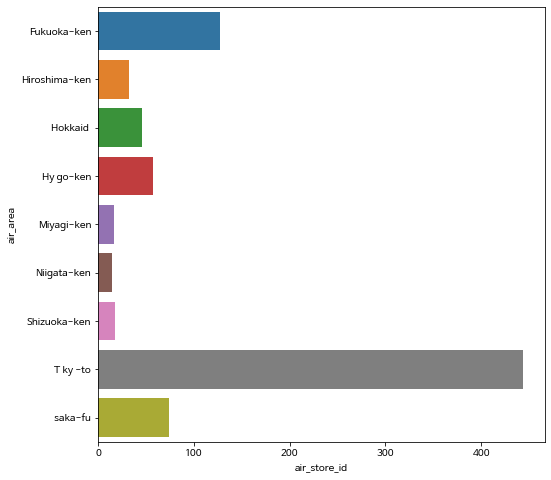

In [175]:
# 지역별 레스토랑 개수(Air_store)
data['as']['air_area'] = data['as']['air_area_name'].str.split(' ').str[0]
air_res = data['as'].groupby(['air_area'], as_index=False)['air_store_id'].count()
f,ax = plt.subplots(1,1, figsize=(8,8))
sns.barplot(data=air_res, x='air_store_id', y='air_area', ax=ax)

In [176]:
# 지역별 레스토랑 개수(HPG_store)
data['hs']['hpg_area'] = data['hs']['hpg_area_name'].str.split(' ').str[0]
data['hs'].groupby(['hpg_area'])['hpg_store_id'].count()

hpg_area
Fukuoka-ken       380
Hiroshima-ken     245
Hokkaidō          298
Hyōgo-ken         331
Kanagawa-ken       61
Miyagi-ken        139
Niigata-ken       142
None              117
Osaka             145
Saitama-ken        11
Shizuoka-ken      231
Tōkyō-to         2076
Ōsaka-fu          514
Name: hpg_store_id, dtype: int64

__지역별 레스토랑 방문객수__

In [177]:
air = pd.merge(data['ar'], data['as'], how='inner', on='air_store_id')
hpg = pd.merge(data['hr'], data['hs'], how='inner', on='hpg_store_id')
rel = data['id']
air_rel = pd.merge(air, rel, how='left', on='air_store_id')
hpg_rel = pd.merge(hpg, rel, how='left', on='hpg_store_id')
full = pd.merge(air_rel, hpg_rel, how='outer')

In [178]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(full[['longitude', 'latitude']])
full['cluster'] = kmeans.predict(full[['longitude', 'latitude']])

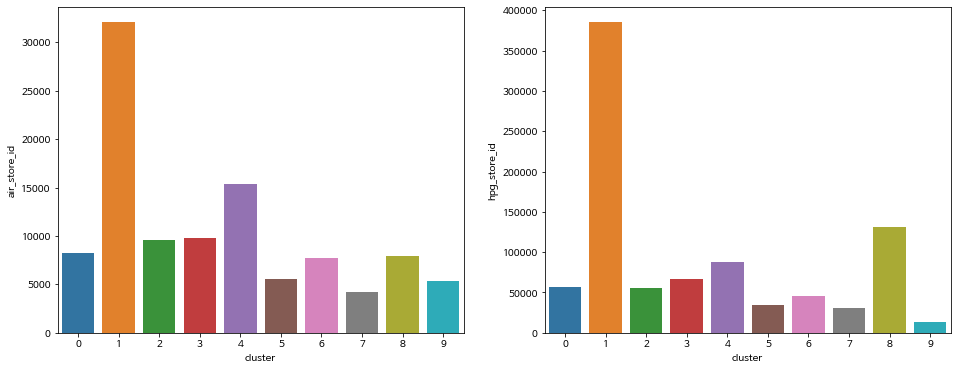

In [179]:
# 지역별 레스토랑 방문횟수
f, ax = plt.subplots(1,2, figsize=(16,6))
hist_clust = full.groupby(['cluster'],as_index=False).count()
sns.barplot(x=hist_clust.cluster, y=hist_clust.air_store_id, ax=ax[0])
sns.barplot(x=hist_clust.cluster, y=hist_clust.hpg_store_id, ax=ax[1])
plt.show()

- Air : 도쿄, 후쿠오카, 니가타 순
- HPG :  도쿄, 오사카, 후쿠오카 순
* 해당 지역의 인구규모 대비 방문횟수를 체크해볼 필요 있음

- Cluster 0 : Hiroshima
- Cluster 1 : Tokyo
- Cluster 2 : Hokkaido Sapporo
- Cluster 3 : Hyogo
- Cluster 4 : Fukuoka
- Cluster 5 : Niigata
- Cluster 6 : Shizuoka
- Cluster 7 : Miyagi
- Cluster 8 : Osaka
- Cluster 9 : Hokkaido Asahikawa

__간단한 전처리__

In [180]:
data['tra'] = pd.merge(data['tra'], data['as'], how='left', on=['air_store_id'])
data['tra'] = pd.merge(data['tra'], data['hol'], how='left', on=['visit_date'])
data['tra'].sort_values(by='visit_date', ignore_index=True, inplace=True)
data['tra']['visit_date'] = pd.to_datetime(data['tra']['visit_date'])
data['tra']['dow'] = data['tra']['visit_date'].dt.dayofweek  # dt.dayofweek : 날짜를 요일로 변환, Monday(0)부터 시작
                                                             #? dow 숫자값을 문자값(월/화/수~) 형태로 변환해주어야함 
data['tra']['year'] = data['tra']['visit_date'].dt.year  # dt.year : 날짜에서 연도 반환(yyyy)
data['tra']['month'] = data['tra']['visit_date'].dt.month  # dt.month : 날짜에서 월 반환(mm)
data['tra']['day'] = data['tra']['visit_date'].dt.day  # dt.day : 날짜에서 일자 반환(dd)
data['tra']['visit_date'] = data['tra']['visit_date'].dt.date  # dt.date : yyyy-mm-dd 로 변환(object)

In [181]:
data['ar'] = pd.merge(data['ar'], data['as'], how='left', on=['air_store_id'])
data['ar']['visit_datetime'] = pd.to_datetime(data['ar']['visit_datetime'])
data['ar']['visit_hour'] = data['ar']['visit_datetime'].dt.hour  # dt.hour : 날짜에서 시간만 반환
data['ar']['visit_date'] = data['ar']['visit_datetime'].dt.date  # dt.date : yyyy-mm-dd 로 변환(object)
data['ar']['reserve_datetime'] = pd.to_datetime(data['ar']['reserve_datetime'])
data['ar']['reserve_hour'] = data['ar']['reserve_datetime'].dt.hour  
data['ar']['reserve_date'] = data['ar']['reserve_datetime'].dt.date 
# 실제 방문시간-예약시점 차이
data['ar']['reserve_visit_diff'] = data['ar'].apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)

In [183]:
# data['hr'] = pd.merge(data['hr'], data['id'], how='inner', on=['hpg_store_id'])
data['hr'] = pd.merge(data['hr'], data['hs'], how='left', on=['hpg_store_id'])
data['hr']['visit_datetime'] = pd.to_datetime(data['ar']['visit_datetime'])
data['hr']['visit_hour'] = data['hr']['visit_datetime'].dt.hour  # dt.hour : 날짜에서 시간만 반환
data['hr']['visit_date'] = data['hr']['visit_datetime'].dt.date  # dt.date : yyyy-mm-dd 로 변환(object)
data['hr']['reserve_datetime'] = pd.to_datetime(data['ar']['reserve_datetime'])
data['hr']['reserve_hour'] = data['hr']['reserve_datetime'].dt.hour  
data['hr']['reserve_date'] = data['hr']['reserve_datetime'].dt.date 
# 실제 방문시간-예약시점 차이
data['hr']['reserve_visit_diff'] = data['hr'].apply(lambda r: (r['visit_date'] - r['reserve_date']).days, axis=1) 

### Store ID 정보

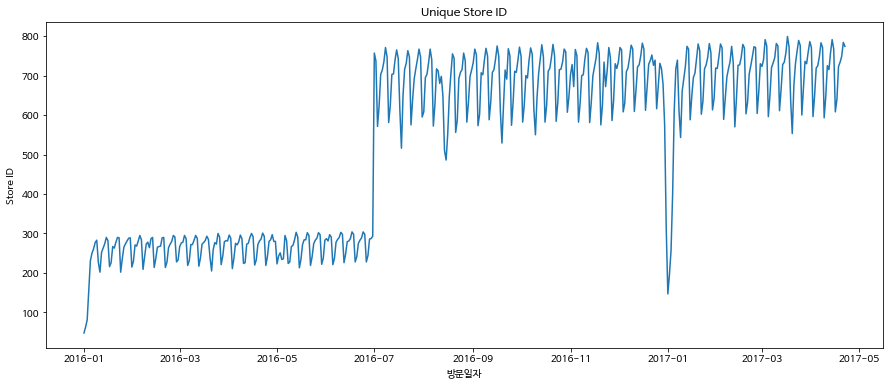

In [184]:
f,ax = plt.subplots(1,1, figsize=(15,6))
stores = data['tra'].groupby(['visit_date'])['air_store_id'].size()
stores.plot(kind='line', ax=ax)
plt.xlabel("방문일자")
plt.ylabel("Store ID")
plt.title("Unique Store ID")
plt.show()

__시사점__ 
- AirREGI(이하 'AIR') 방문자 DB가 담겨있는 테이블이다.
- 약 800여개의 Store ID 정보가 있는데 2016년 7월을 기점으로 Store ID 숫자가 급증하였다. 이는 새로 문을 연 레스토랑이 많아졌다기 보다는 해당 플랫폼을 이용하는 레스토랑의 숫자가 많아졌다고 예측해볼 수 있다.
- 반면에 2017년 1월에 Store ID 숫자가 급감하였는데 이는 해당 기간에는 문을 닫았다는 것으로 추측할 수 있다
- 그래프에서의 진폭은 주기적인 것으로 보아 평일/주말의 영향으로 인해 생긴 것으로 생각된다.

In [185]:
data['tra'].head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,air_area,day_of_week,holiday_flg,dow,year,month,day
0,air_fab092c35776a9b1,2016-01-01,19,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,Fukuoka-ken,Friday,1,4,2016,1,1
1,air_f26f36ec4dc5adb0,2016-01-01,64,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,Tōkyō-to,Friday,1,4,2016,1,1
2,air_d97dabf7aae60da5,2016-01-01,102,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,Tōkyō-to,Friday,1,4,2016,1,1
3,air_39dccf7df20b1c6a,2016-01-01,55,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,Hyōgo-ken,Friday,1,4,2016,1,1
4,air_79f528087f49df06,2016-01-01,42,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,Tōkyō-to,Friday,1,4,2016,1,1


### 일자별 방문 고객 및 예약 현황

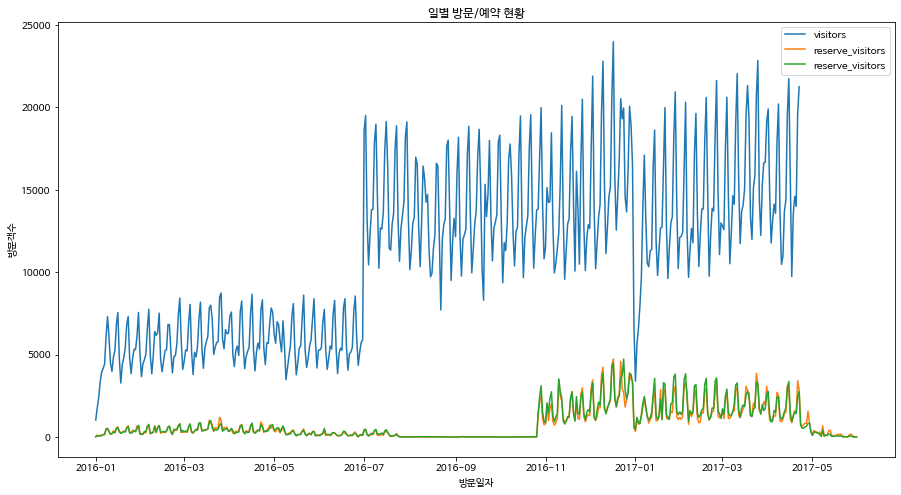

In [186]:
f,ax = plt.subplots(1,1,figsize=(15, 8))
plt1 = data['tra'].groupby('visit_date', as_index=False)['visitors'].sum()
plt1.plot(x='visit_date', y='visitors', ax=ax)

plt2 = data['ar'].groupby('visit_date', as_index=False)['reserve_visitors'].sum()
plt2.plot(x='visit_date', y='reserve_visitors', ax=ax)

plt3 = data['hr'].groupby('visit_date', as_index=False)['reserve_visitors'].sum()  # 처음 그렸던 그래프와 데이터가 달라져서 다시 데이터를 볼 필요가 있음!!!
plt3.plot(x='visit_date', y='reserve_visitors', ax=ax)

plt.xlabel('방문일자')
plt.ylabel('방문객수')
plt.title('일별 방문/예약 현황')
plt.show()

__시사점__
- 앞에서 언급했던 2016년 7월 Store ID 증가와 더불어 실제 방문객 수가 급증한 것으로 보아 예약 시스템에 새로운 식당의 추가, 방문자 집계 시스템 개편. 예약 프로모션 등의 이슈가 있었을 것으로 예상된다.  
- 2017년 1월도 마찬가지로 방문객 수가 감소한 것으로 보아 연말/연초에 문을 닫았던 레스토랑이 많은 것으로 예상된다.
- HPG를 통한 예약보다 AIR를 통한 예약 수가 더 많다.
- 그래프를 통해 예약을 통한 방문객 보다 워크인(Walk-in) 방문객이 더 많은 것을 알 수 있다.

### 방문객수 현황

__월별/일자별 방문객 수__

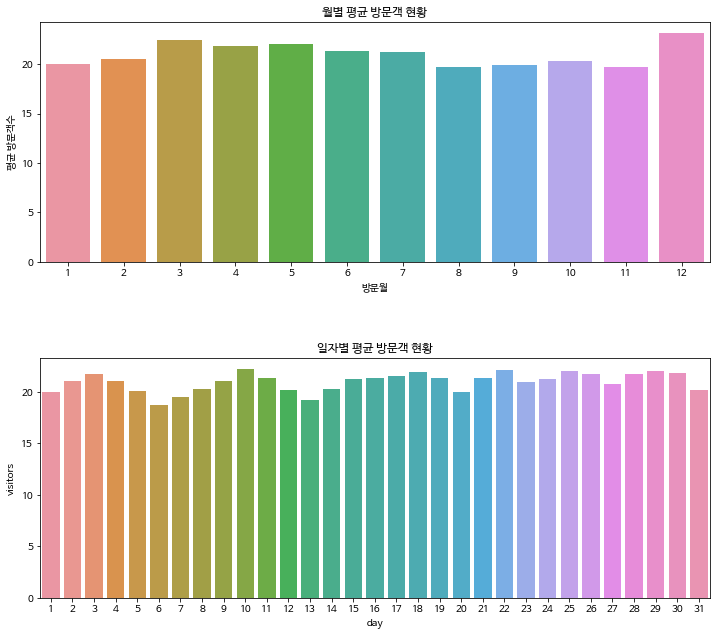

In [229]:
f,ax = plt.subplots(2,1,figsize=(12, 10))
month_vis = data['tra'].groupby('month', as_index=False)['visitors'].mean()
sns.barplot(data=month_vis, x='month', y='visitors', ax=ax[0])
ax[0].set_xlabel('방문월')
ax[0].set_ylabel('평균 방문객수')
ax[0].set_title('월별 평균 방문객 현황')

temp = data['tra'].groupby('day', as_index=False)['visitors'].mean()
sns.barplot(data=temp, x='day', y='visitors', ax=ax[1])
ax[1].set_xlabel('방문일자')
ax[1].set_ylabel('평균 방문객수')
ax[1].set_title('일자별 평균 방문객 현황')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show()

__시사점__
- 월별 방문객 현황  
  - 월별로 확인했을 때 방문객 수가 가장 많은 달은 12월이다. (송년회 영향이라고 추측 해본다.) 
  - 12월 다음으로는 봄(3~5월)이 방문객 수가 많다. 4월 말 ~ 5월 초 골든 위크의 영향이 어느정도 있지 않을까 예상된다.

- 일자별 방문객 현황  
  - 매월 3일, 10일, 22일이 평균 방문객 수가 가장 높다. 혹시 월급날과 관련이 있는 달인가 의심도 해보았으나 일본의 월급날은 25일 혹은 5일 단위가 많다고 한다.  
  - 매월 6일, 13일, 20일, 31일 방문객 수가 감소하고 있다

__요일/공휴일 여부에 따른 방문객 수__

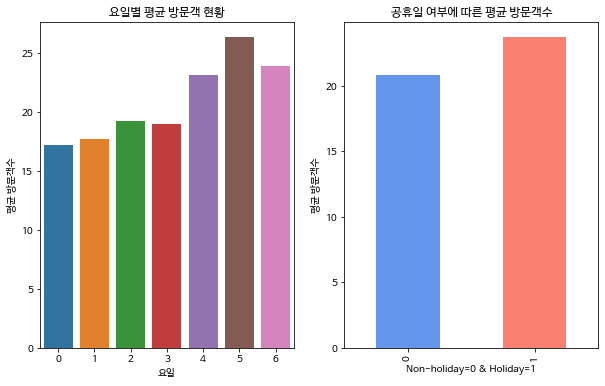

In [234]:
f,ax = plt.subplots(1,2,figsize=(18, 6))
dow_vis = data['tra'].groupby('dow', as_index=False)['visitors'].mean()
sns.barplot(data=dow_vis, x='dow', y='visitors', ax=ax[0])
# plt1.plot.bar(x='dow', ax=ax)
ax[0].set_xlabel('요일')
ax[0].set_ylabel('평균 방문객수')
ax[0].set_title('요일별 평균 방문객 현황')

temp = data['tra'].groupby('holiday_flg')['visitors'].mean()
temp.plot.bar(x='holiday_flg', y='visitors', color=['cornflowerblue', 'salmon'], figsize=(10,6), ax=ax[1])
ax[1].set_xlabel('Non-holiday=0 & Holiday=1')
ax[1].set_ylabel('평균 방문객수')
ax[1].set_title('공휴일 여부에 따른 평균 방문객수')

plt.show()  #? 숫자로 된 요일을 문자열로 바꾸는법

__시사점__
- 요일별 방문객 현황  
  - 상식적으로 생각할 수 있는 예상대로 평일(월-목) 보다 주말(금-일)의 방문객 수가 많다.
- 공휴일 여부에 따른 방문객 현황
  - 평일보다 공휴일의 방문객 수가 많다

### 방문시간 현황

Text(0.5, 1.0, '일자별 평균 방문객 현황(HPG)')

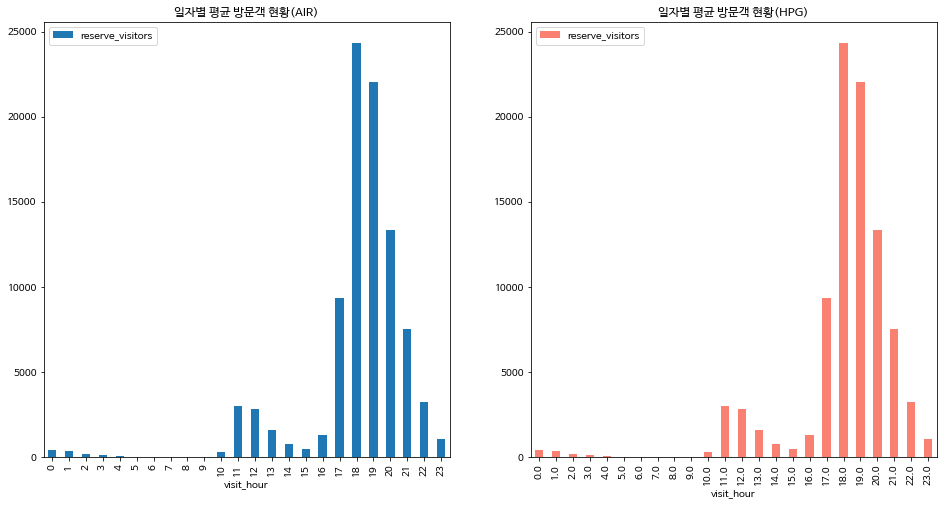

In [194]:
f, ax = plt.subplots(1,2, figsize=(16,8))
vis_time1 = data['ar'].groupby(['visit_hour'])['reserve_visitors'].count().to_frame()
vis_time1.plot(kind='bar', ax=ax[0])
ax[0].set_title('일자별 평균 방문객 현황(AIR)')

vis_time2 = data['hr'].groupby(['visit_hour'])['reserve_visitors'].count().to_frame()
vis_time2.plot(kind='bar', color='salmon', ax=ax[1])
ax[1].set_title('일자별 평균 방문객 현황(HPG)')

__시사점__
- 저녁 시간대인 18시에서 20시 사이에 방문객 수가 가장 많은 것을 확인할 수 있다.

### 장르별 레스토랑 현황

__장르별 레스토랑 Market share__

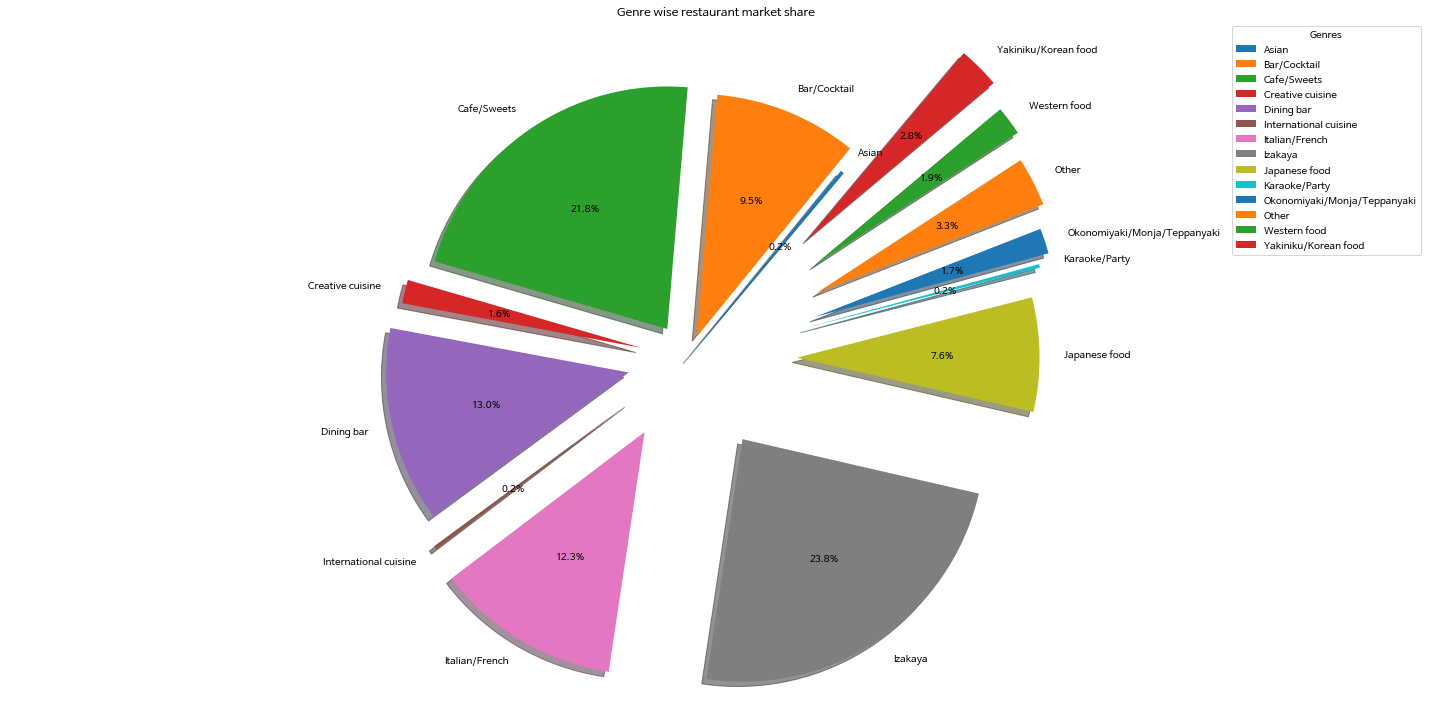

In [201]:
temp =data['as'].groupby(['air_genre_name'],as_index=False)['air_store_id'].count()
labels = temp.air_genre_name.values
sizes = temp.air_store_id.values
explode = (0, 0.1, 0.15, 0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7)  
f,ax = plt.subplots(figsize=(20,10))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=50)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.legend(title='Genres')
plt.title('Genre wise restaurant market share')
plt.show()

__장르별 레스토랑 분류(AIR vs. HPG)__

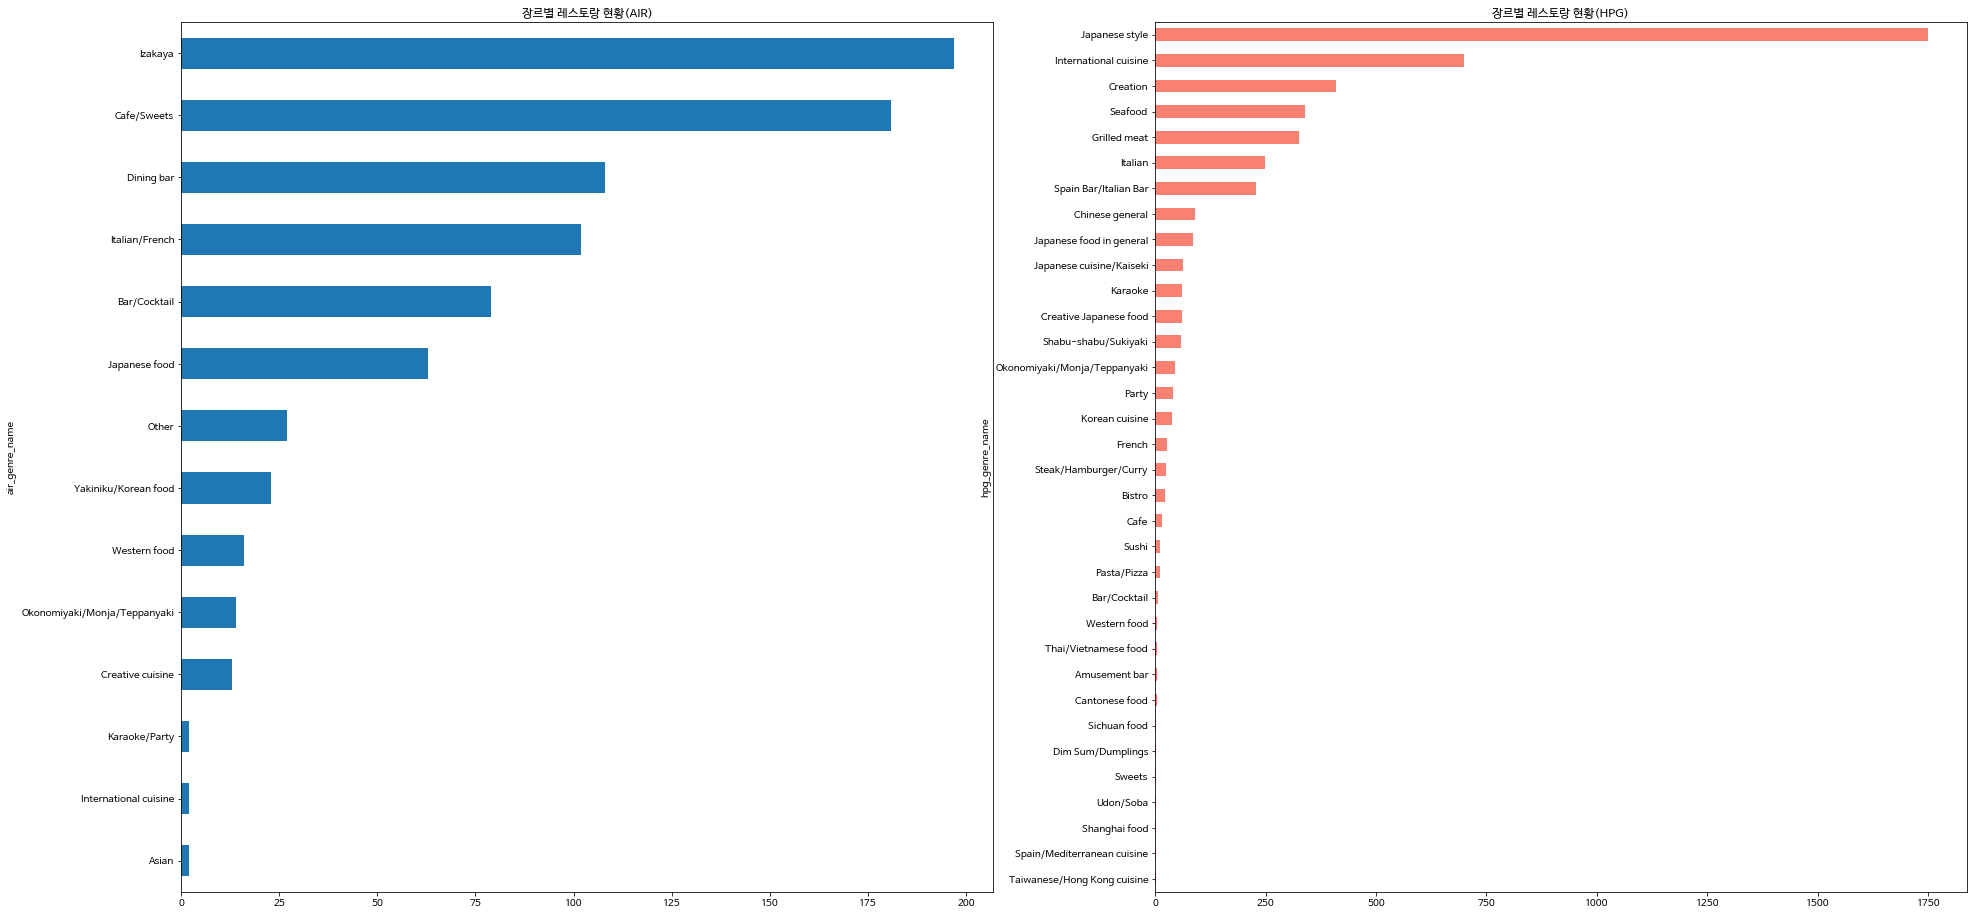

In [215]:
f, ax = plt.subplots(1, 2, figsize=(32,16))

air_genre = data['as'].groupby(['air_genre_name'])['air_genre_name'].count().sort_values()
air_genre.plot.barh(x='air_genre_name', ax=ax[0])
ax[0].set_title('장르별 레스토랑 현황(AIR)')

hpg_genre = data['hs'].groupby(['hpg_genre_name'])['hpg_genre_name'].count().sort_values()
hpg_genre.plot.barh(x='hpg_genre_name', color='salmon', ax=ax[1])
ax[1].set_title('장르별 레스토랑 현황(HPG)')

plt.show()

__고객들이 가장 많이 찾는 레스토랑 Genre는?__

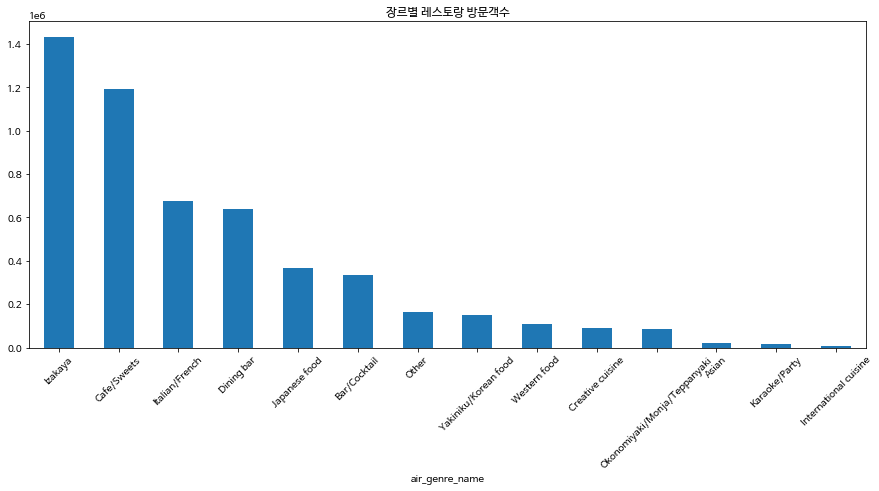

In [247]:
f, ax = plt.subplots(1, 1, figsize=(15,6))
air_genre = data['tra'].groupby(['air_genre_name'])['visitors'].sum().sort_values(ascending=False)
air_genre.plot.bar(x='air_genre_name', ax=ax)

plt.title('장르별 레스토랑 방문객수')
plt.xticks(rotation=45)
plt.show()

__시사점__
- AIR : 레스토랑을 14개의 카테고리로 분류하고 있다. 이자카야, 카페/디저트 레스토랑이 가장 많다.
- HPG :레스토랑의 장르가 매우 다양하게 분류되어 있다.

## Remove

### Air Reservation

In [190]:
# 필요 없으면 나중에 지울 예정
# for df in ['ar', 'hr']:
#     data[df]['visit_datetime'] = pd.to_datetime(data[df]['visit_datetime'])  # dtype 변경(object -> datetime64)
#     data[df]['visit_datetime'] = data[df]['visit_datetime'].dt.date  
#     data[df]['reserve_datetime'] = pd.to_datetime(data[df]['reserve_datetime'])
#     data[df]['reserve_datetime'] = data[df]['reserve_datetime'].dt.date 
    # data[df]['reserve_datetime_diff'] = data[df].apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)

In [191]:
data['ar'] = pd.merge(data['ar'], data['as'], how='left', on=['air_store_id'])
data['ar']['visit_datetime'] = pd.to_datetime(data['ar']['visit_datetime'])
data['ar']['visit_hour'] = data['ar']['visit_datetime'].dt.hour  # dt.hour : 날짜에서 시간만 반환
data['ar']['visit_date'] = data['ar']['visit_datetime'].dt.date  # dt.date : yyyy-mm-dd 로 변환(object)
data['ar']['reserve_datetime'] = pd.to_datetime(data['ar']['reserve_datetime'])
data['ar']['reserve_hour'] = data['ar']['reserve_datetime'].dt.hour  
data['ar']['reserve_date'] = data['ar']['reserve_datetime'].dt.date 
# 실제 방문시간-예약시점 차이
data['ar']['reserve_visit_diff'] = data['ar'].apply(lambda r: (r['visit_date'] - r['reserve_date']).days, axis=1)

# 필요 없으면 나중에 지울 예정
# data['ar']['dow'] = data['ar']['visit_datetime'].dt.dayofweek  # dt.dayofweek : 날짜를 요일로 변환, Monday(0)부터 시작
#                                                              #? dow 숫자값을 문자값(월/화/수~) 형태로 변환해주어야함 
# data['ar']['year'] = data['ar']['visit_datetime'].dt.year  # dt.year : 날짜에서 연도 반환(yyyy)
# data['ar']['month'] = data['ar']['visit_datetime'].dt.month  # dt.month : 날짜에서 월 반환(mm)
# data['ar']['day'] = data['ar']['_datetime'].dt.day  # dt.day : 날짜에서 일자 반환(dd)

In [192]:
data['ar'].head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name_x,air_area_name_x,latitude_x,longitude_x,air_area_x,visit_hour,visit_date,reserve_hour,reserve_date,reserve_visit_diff,air_genre_name_y,air_area_name_y,latitude_y,longitude_y,air_area_y
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,19,2016-01-01,16,2016-01-01,0,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,Ōsaka-fu,19,2016-01-01,19,2016-01-01,0,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,Ōsaka-fu
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,Ōsaka-fu,19,2016-01-01,19,2016-01-01,0,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,Ōsaka-fu
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,20,2016-01-01,16,2016-01-01,0,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,Dining bar,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,Hokkaidō,20,2016-01-01,1,2016-01-01,0,Dining bar,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,Hokkaidō


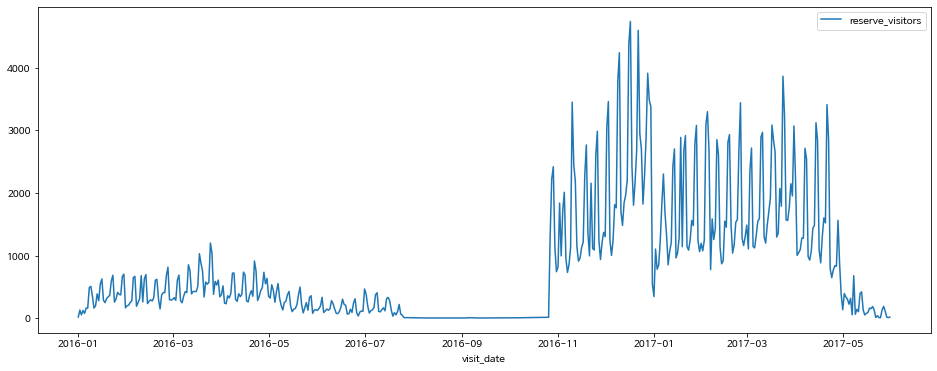

In [193]:
f,ax = plt.subplots(1,1,figsize=(16, 6))
day_visitors = data['ar'].groupby('visit_date', as_index=False)['reserve_visitors'].sum()
day_visitors.plot(x='visit_date', y='reserve_visitors', ax=ax)
plt.show()

# visit/air예약/hpg예약 plot을 한 장에 그려서 워크인 고객이 예약 고객보다 훨씬 많다는 것 보여줄 수 있다.

2016년 상반기는 상대적으로 예약을 통한 방문객 수가 많지 않았으며,  
심지어 8월에서 10월까지는 예약을 통한 방문객 수가 없다.
시스템에 문제가 있어 서비스를 제공하지 않았을 수도 있다.
11월 이후부터 연말까지 예약 시스템 개선, 예약 가능 식당 추가, 프로모션 등의 이슈가 있어 예약이 증가한게 아닐까 생각된다.  
2017년 초에 방문객 수가 줄어든 건 연말연초에 레스토랑이 문을 닫아서 그런것은 아닐까? 추가적으로 예약 프로모션 같은 것도 종료되었을 수도 있다. (실제 방문객 수 추이 대비 예약 수치 추이가 더 줄어들었다.)

### HPG Reservation

In [195]:
# data['hr'] = pd.merge(data['hr'], data['id'], how='inner', on=['hpg_store_id'])
data['hr'] = pd.merge(data['hr'], data['hs'], how='left', on=['hpg_store_id'])
data['hr']['visit_datetime'] = pd.to_datetime(data['ar']['visit_datetime'])
data['hr']['visit_hour'] = data['hr']['visit_datetime'].dt.hour  # dt.hour : 날짜에서 시간만 반환
data['hr']['visit_date'] = data['hr']['visit_datetime'].dt.date  # dt.date : yyyy-mm-dd 로 변환(object)
data['hr']['reserve_datetime'] = pd.to_datetime(data['ar']['reserve_datetime'])
data['hr']['reserve_hour'] = data['hr']['reserve_datetime'].dt.hour  
data['hr']['reserve_date'] = data['hr']['reserve_datetime'].dt.date 
# 실제 방문시간-예약시점 차이
data['hr']['reserve_visit_diff'] = data['hr'].apply(lambda r: (r['visit_date'] - r['reserve_date']).days, axis=1) 

In [196]:
data['hr']

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name_x,hpg_area_name_x,latitude_x,longitude_x,hpg_area_x,visit_hour,visit_date,reserve_hour,reserve_date,reserve_visit_diff,hpg_genre_name_y,hpg_area_name_y,latitude_y,longitude_y,hpg_area_y
0,hpg_c63f6f42e088e50f,2016-01-01 19:00:00,2016-01-01 16:00:00,1,NaN,NaN,NaN,NaN,NaN,19.0,2016-01-01,16.0,2016-01-01,0.0,NaN,NaN,NaN,NaN,NaN
1,hpg_dac72789163a3f47,2016-01-01 19:00:00,2016-01-01 19:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,Hyōgo-ken,19.0,2016-01-01,19.0,2016-01-01,0.0,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,Hyōgo-ken
2,hpg_c8e24dcf51ca1eb5,2016-01-01 19:00:00,2016-01-01 19:00:00,2,NaN,NaN,NaN,NaN,NaN,19.0,2016-01-01,19.0,2016-01-01,0.0,NaN,NaN,NaN,NaN,NaN
3,hpg_24bb207e5fd49d4a,2016-01-01 20:00:00,2016-01-01 16:00:00,5,NaN,NaN,NaN,NaN,NaN,20.0,2016-01-01,16.0,2016-01-01,0.0,NaN,NaN,NaN,NaN,NaN
4,hpg_25291c542ebb3bc2,2016-01-01 20:00:00,2016-01-01 01:00:00,13,NaN,NaN,NaN,NaN,NaN,20.0,2016-01-01,1.0,2016-01-01,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000315,hpg_2b293477ea4642fb,NaT,NaT,2,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2000316,hpg_f922aeca48ca5a29,NaT,NaT,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2000317,hpg_e9151de687b93aa3,NaT,NaT,49,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2000318,hpg_fae6c96189b4a122,NaT,NaT,9,Japanese food in general,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,Hyōgo-ken,NaN,NaT,NaN,NaT,NaN,Japanese food in general,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,Hyōgo-ken


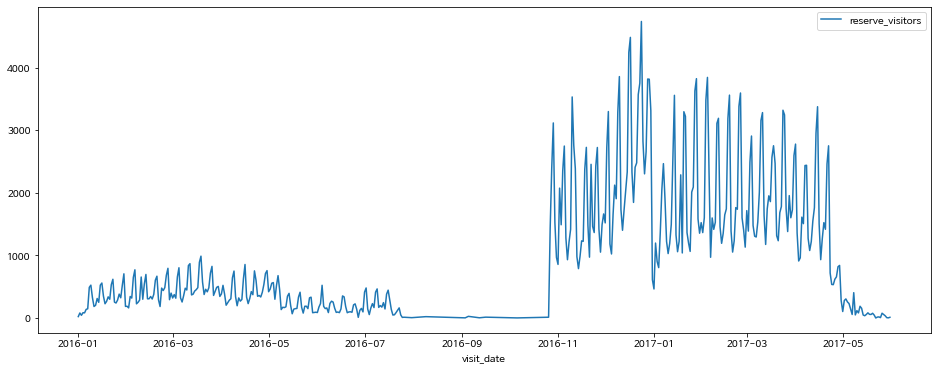

In [197]:
f,ax = plt.subplots(1,1,figsize=(16, 6))
plt1 = data['hr'].groupby('visit_date', as_index=False)['reserve_visitors'].sum()
plt1.plot(x='visit_date', y='reserve_visitors', ax=ax)
plt.show()

# 그래프가 이상하게 나오는 것 같다. 다시 확인해보자

연말 시점에 예약이 급증한 것으로 보아 이벤트가 있었던 것 같다.

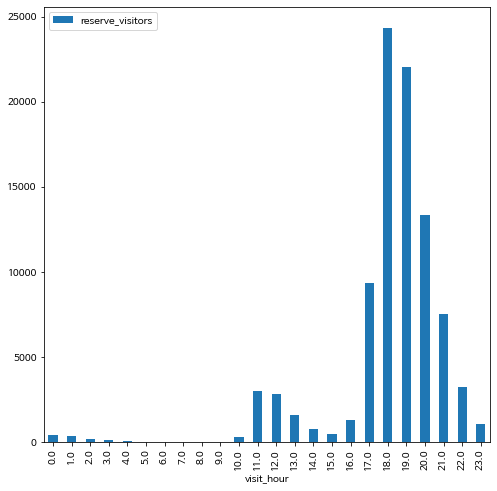

In [198]:
# 고객들이 가장 많이 방문하는 시간대는?
f, ax = plt.subplots(1,1, figsize=(8,8))
vis_time = data['hr'].groupby(['visit_hour'])['reserve_visitors'].count().to_frame()
vis_time.plot(kind='bar', ax=ax)

In [199]:
data['ar'].head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name_x,air_area_name_x,latitude_x,longitude_x,air_area_x,visit_hour,visit_date,reserve_hour,reserve_date,reserve_visit_diff,air_genre_name_y,air_area_name_y,latitude_y,longitude_y,air_area_y
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,19,2016-01-01,16,2016-01-01,0,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,Ōsaka-fu,19,2016-01-01,19,2016-01-01,0,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,Ōsaka-fu
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,Ōsaka-fu,19,2016-01-01,19,2016-01-01,0,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,Ōsaka-fu
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,20,2016-01-01,16,2016-01-01,0,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,Dining bar,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,Hokkaidō,20,2016-01-01,1,2016-01-01,0,Dining bar,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,Hokkaidō


In [200]:
# 방문 하기 얼마 전에 고객들은 예약을 할까?

# 그래프를 그렸으나 다시 그려야 함(구간을 쪼개야하나? 시간 단위로 볼 수 는 없을까?)
# time_gap = data['ar'].groupby('reserve_visit_diff')['reserve_visit_diff'].sum()[:40].to_frame()
# time_gap.plot(kind='bar', figsize=(30,6))

# plt.show()